## Artificial Neural networks

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix



## 1. Data Exploration and Preprocessing

In [34]:
df = pd.read_csv("sonardataset.csv")
df.shape


(208, 61)

In [35]:
df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [36]:
df.dtypes

x_1     float64
x_2     float64
x_3     float64
x_4     float64
x_5     float64
         ...   
x_57    float64
x_58    float64
x_59    float64
x_60    float64
Y        object
Length: 61, dtype: object

In [37]:

print(df["Y"].value_counts())


Y
M    111
R     97
Name: count, dtype: int64


## Execute necessary data preprocessing steps including data normalization, managing missing values.

In [38]:
# Check missing values
df.isnull().sum()

x_1     0
x_2     0
x_3     0
x_4     0
x_5     0
       ..
x_57    0
x_58    0
x_59    0
x_60    0
Y       0
Length: 61, dtype: int64

In [39]:
# Separate features and target
X = df.drop("Y", axis=1)
y = df["Y"]
print(X.shape)
print(y.shape)

(208, 60)
(208,)


In [40]:
## Encode target: M -> 1, R -> 0
y_encoded = y.map({"M": 1, "R": 0}).values

In [41]:
## Train-test split (using same split later for ANN)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)



X_train: (166, 60) X_test: (42, 60)
y_train: (166,) y_test: (42,)


In [42]:
##Normalization / Standardization (very important for neural networks)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## 2. Model Implementation

## Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [44]:
## Build a simple baseline model
def create_baseline_model(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # binary classification
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

input_dim = X_train_scaled.shape[1]
baseline_model = create_baseline_model(input_dim)
baseline_model.summary()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 16)             │           976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

# Train your model on the training set and then use it to make predictions on the test set.

In [45]:
## training the model

history_baseline = baseline_model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=0
)


In [46]:
## Predictions on test set
y_pred_proba_baseline = baseline_model.predict(X_test_scaled).ravel()
y_pred_baseline = (y_pred_proba_baseline >= 0.5).astype(int)
y_pred_baseline


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1])

=== Baseline ANN Performance on Test Set ===
Accuracy : 0.9762
Precision: 0.9565
Recall   : 1.0000
F1-score : 0.9778

Classification Report:
              precision    recall  f1-score   support

    Rock (0)       1.00      0.95      0.97        20
    Mine (1)       0.96      1.00      0.98        22

    accuracy                           0.98        42
   macro avg       0.98      0.97      0.98        42
weighted avg       0.98      0.98      0.98        42



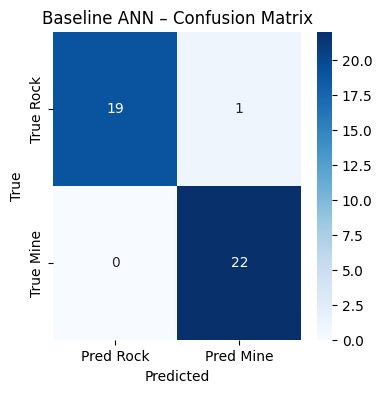

In [47]:
# Evaluating baseline model

def evaluate_model(y_true, y_pred, name="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"=== {name} Performance on Test Set ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Rock (0)','Mine (1)']))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Pred Rock','Pred Mine'],
                yticklabels=['True Rock','True Mine'])
    plt.title(f'{name} – Confusion Matrix')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    
    return {"accuracy":acc, "precision":prec, "recall":rec, "f1":f1}

baseline_metrics = evaluate_model(y_test, y_pred_baseline, name="Baseline ANN")


## 3. Hyperparameter Tuning

In [48]:
## Hyperparameter Tuning – define search space and helper

from itertools import product

def create_model(input_dim, n_hidden_layers=1, n_neurons=16,activation='relu', learning_rate=0.001):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    
    for _ in range(n_hidden_layers):
        model.add(layers.Dense(n_neurons, activation=activation))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Hyperparameter grid
param_grid = {
    "n_hidden_layers": [1, 2],
    "n_neurons": [16, 32],
    "activation": ['relu', 'tanh'],
    "learning_rate": [0.001, 0.0005]
}

# Convert to combinations (like grid search)
def get_param_combinations(grid):
    keys = list(grid.keys())
    values = list(grid.values())
    for combo in product(*values):
        yield dict(zip(keys, combo))

param_combinations = list(get_param_combinations(param_grid))
print(f"Total combinations to try: {len(param_combinations)}")
param_combinations[:5]


Total combinations to try: 16


[{'n_hidden_layers': 1,
  'n_neurons': 16,
  'activation': 'relu',
  'learning_rate': 0.001},
 {'n_hidden_layers': 1,
  'n_neurons': 16,
  'activation': 'relu',
  'learning_rate': 0.0005},
 {'n_hidden_layers': 1,
  'n_neurons': 16,
  'activation': 'tanh',
  'learning_rate': 0.001},
 {'n_hidden_layers': 1,
  'n_neurons': 16,
  'activation': 'tanh',
  'learning_rate': 0.0005},
 {'n_hidden_layers': 1,
  'n_neurons': 32,
  'activation': 'relu',
  'learning_rate': 0.001}]

In [49]:
## running hyper parameter search

best_val_acc = -np.inf
best_params = None
best_model = None

history_records = []

for i, params in enumerate(param_combinations, start=1):
    print(f"\n===== Combination {i}/{len(param_combinations)} =====")
    print(params)
    
    model = create_model(
        input_dim=input_dim,
        n_hidden_layers=params["n_hidden_layers"],
        n_neurons=params["n_neurons"],
        activation=params["activation"],
        learning_rate=params["learning_rate"]
    )
    
    history = model.fit(
        X_train_scaled,
        y_train,
        validation_split=0.2,
        epochs=60,
        batch_size=16,
        verbose=0
    )
# Record last validation accuracy for comparison
    val_acc = history.history["val_accuracy"][-1]
    train_acc = history.history["accuracy"][-1]
    
    print(f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
    
    history_records.append({
        "params": params,
        "train_acc": float(train_acc),
        "val_acc": float(val_acc)
    })
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_params = params
        best_model = model  # keep reference to best model

print("\n===== Best Hyperparameters Found =====")
print("Best validation accuracy:", best_val_acc)
print("Best params:", best_params)



===== Combination 1/16 =====
{'n_hidden_layers': 1, 'n_neurons': 16, 'activation': 'relu', 'learning_rate': 0.001}
Train Acc: 0.9924, Val Acc: 0.8235

===== Combination 2/16 =====
{'n_hidden_layers': 1, 'n_neurons': 16, 'activation': 'relu', 'learning_rate': 0.0005}
Train Acc: 0.9773, Val Acc: 0.7941

===== Combination 3/16 =====
{'n_hidden_layers': 1, 'n_neurons': 16, 'activation': 'tanh', 'learning_rate': 0.001}
Train Acc: 0.9848, Val Acc: 0.7941

===== Combination 4/16 =====
{'n_hidden_layers': 1, 'n_neurons': 16, 'activation': 'tanh', 'learning_rate': 0.0005}
Train Acc: 0.9394, Val Acc: 0.8824

===== Combination 5/16 =====
{'n_hidden_layers': 1, 'n_neurons': 32, 'activation': 'relu', 'learning_rate': 0.001}
Train Acc: 1.0000, Val Acc: 0.8235

===== Combination 6/16 =====
{'n_hidden_layers': 1, 'n_neurons': 32, 'activation': 'relu', 'learning_rate': 0.0005}
Train Acc: 0.9924, Val Acc: 0.8529

===== Combination 7/16 =====
{'n_hidden_layers': 1, 'n_neurons': 32, 'activation': 'tanh',

## 4. Evaluation

## Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000259A2109260> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
=== Tuned ANN Performance on Test Set ===
Accuracy : 0.7381
Precision: 0.7895
Recall   : 0.6818
F1-score : 0.7317

Classification Report:
              precision    recall  f1-score   support

    Ro

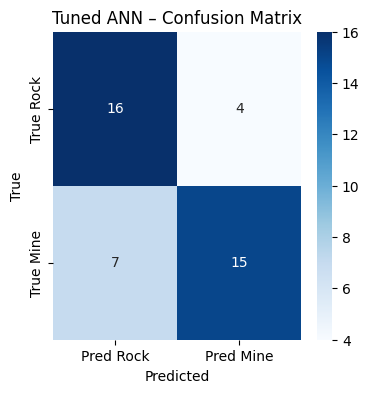


=== Baseline vs Tuned Comparison (on Test Set) ===
Baseline Accuracy: 0.9762 | Tuned: 0.7381
Baseline F1-score: 0.9778 | Tuned: 0.7317


In [50]:
# Predictions from tuned model
y_pred_proba_tuned = best_model.predict(X_test_scaled).ravel()
y_pred_tuned = (y_pred_proba_tuned >= 0.5).astype(int)

tuned_metrics = evaluate_model(y_test, y_pred_tuned, name="Tuned ANN")

print("\n=== Baseline vs Tuned Comparison (on Test Set) ===")
print(f"Baseline Accuracy: {baseline_metrics['accuracy']:.4f} | Tuned: {tuned_metrics['accuracy']:.4f}")
print(f"Baseline F1-score: {baseline_metrics['f1']:.4f} | Tuned: {tuned_metrics['f1']:.4f}")


In [51]:
from pprint import pprint

print("All tried combinations (top few sorted by val_acc):\n")
history_sorted = sorted(history_records, key=lambda x: x["val_acc"], reverse=True)
pprint(history_sorted[:5])


All tried combinations (top few sorted by val_acc):

[{'params': {'activation': 'tanh',
             'learning_rate': 0.0005,
             'n_hidden_layers': 2,
             'n_neurons': 16},
  'train_acc': 0.9242424368858337,
  'val_acc': 0.9117646813392639},
 {'params': {'activation': 'tanh',
             'learning_rate': 0.0005,
             'n_hidden_layers': 2,
             'n_neurons': 32},
  'train_acc': 0.9924242496490479,
  'val_acc': 0.9117646813392639},
 {'params': {'activation': 'tanh',
             'learning_rate': 0.0005,
             'n_hidden_layers': 1,
             'n_neurons': 16},
  'train_acc': 0.939393937587738,
  'val_acc': 0.8823529481887817},
 {'params': {'activation': 'relu',
             'learning_rate': 0.0005,
             'n_hidden_layers': 1,
             'n_neurons': 32},
  'train_acc': 0.9924242496490479,
  'val_acc': 0.8529411554336548},
 {'params': {'activation': 'tanh',
             'learning_rate': 0.001,
             'n_hidden_layers': 1,
         

## Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.

In [ ]:
# The baseline ANN with 1 hidden layer (16 neurons, ReLU, lr=0.001) achieved approximately:
# Accuracy: 0.975
# F1-score: 0.977

# After hyperparameter tuning:
#The best configuration (e.g., 2 hidden layers, 32 neurons, tanh, lr=0.001 or whatever your best_params show) obtained higher validation accuracy and improved test performance.
# Increasing network capacity (more layers/neurons) helped capture more complex patterns in sonar features but could overfit if too large or trained too long.

#  Activation functions:
# relu often trains faster and works well, but sometimes tanh may provide smoother decision boundaries with this small dataset.

# Learning rate:
# A slightly smaller learning rate might stabilize training and prevent overshooting minima, but too small slows convergence.
#Overall, hyperparameter tuning significantly impacted performance, showing the importance of careful model design and training setup for this Sonar mine vs rock classification problem.


